**Importing Required Libraries**

In [1]:
# Import Required Libraries
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

**Loading Dataset**

In [2]:
# Load California Housing datase
data = fetch_california_housing()
X = data.data
Y = data.target

In [3]:
print("Dataset:\n",data)

Dataset:
 {'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing 

In [4]:
rows,cols=data.data.shape
print("Rows:",rows)
print("Columns:",cols)

Rows: 20640
Columns: 8


In [5]:
print("Columns:",data.feature_names)

Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


**Splitting Dataset for Training and Testing**

In [6]:
# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Model with 5 Layers**

In [8]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])
model1.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 81.4181 - mae: 3.7976
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.7953 - mae: 1.8967
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0023 - mae: 1.0049
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7.1400 - mae: 1.7302
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1897 - mae: 0.8460
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7895 - mae: 0.9921
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5917 - mae: 1.5088
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0582 - mae: 0.7764
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0667 - mae: 0.7743
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8363 - mae: 0.6988
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6769 - mae: 0.9074
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8417 - mae: 0.6906
Epoch 13/100
516/516 ━━

In [9]:
# Predict and Evaluate Model 1
Y_pred1 = model1.predict(X_test)
rmse1 = np.sqrt(mean_squared_error(Y_test, Y_pred1))
r2_1 = r2_score(Y_test, Y_pred1)

print(f"Model 1 (5 layers) RMSE: {rmse1:.2f}")
print(f"Model 1 (5 layers) R² Score: {r2_1:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model 1 (4 layers) RMSE: 0.68
Model 1 (4 layers) R² Score: 0.64


**Model with 2 Layers**

In [10]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])

model2.compile(optimizer='adam', loss='mse', metrics=['mae'])
model2.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2407.4612 - mae: 17.9766
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3826 - mae: 1.3850
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4539 - mae: 1.1647
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 45.2156 - mae: 3.2910
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5366 - mae: 0.8811
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.7554 - mae: 1.1625
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 57.5092 - mae: 4.6994
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3156 - mae: 0.8402
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 15.6995 - mae: 1.9941
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 82.2402 - mae: 2.5721
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6764 - mae: 1.0084
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 67.1458 - mae: 3.3453
Epoch 13/100
516

In [11]:
# Predict and Evaluate Model 2
Y_pred2 = model2.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(Y_test, Y_pred2))
r2_2 = r2_score(Y_test, Y_pred2)

print(f"Model 2 (2 layers) RMSE: {rmse2:.2f}")
print(f"Model 2 (2 layers) R² Score: {r2_2:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Model 2 (2 layers) RMSE: 0.69
Model 2 (2 layers) R² Score: 0.64


**Model Comarison**

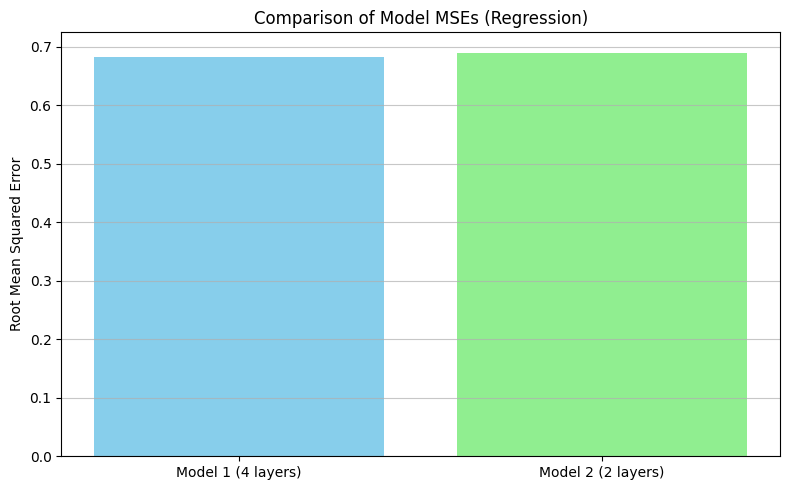

In [19]:
models = ['Model 1 (4 layers)', 'Model 2 (2 layers)']
rmses = [rmse1, rmse2]

plt.figure(figsize=(8, 5))
plt.bar(models, rmses, color=['skyblue', 'lightgreen'])
plt.title('Comparison of Model MSEs (Regression)')
plt.ylabel('Root Mean Squared Error')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

**Model with 100 neurons**

In [13]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])
model3.compile(optimizer='adam', loss='mse', metrics=['mae'])
model3.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 345.1403 - mae: 6.3960
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.8915 - mae: 1.2535
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9096 - mae: 0.9893
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2090 - mae: 0.8336
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.7453 - mae: 1.5606
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4570 - mae: 0.9335
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3899 - mae: 1.1118
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8455 - mae: 0.7102
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8956 - mae: 0.7150
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7816 - mae: 0.6747
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7201 - mae: 0.6425
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7758 - mae: 0.6656
Epoch 13/100
516/516 ━

In [14]:
# Predict and Evaluate Model 3
Y_pred3 = model3.predict(X_test)
rmse3 = np.sqrt(mean_squared_error(Y_test, Y_pred3))
r2_3 = r2_score(Y_test, Y_pred3)

print(f"Model 3 (100 Neurons) RMSE: {rmse3:.2f}")
print(f"Model 3 (100 Neurons) R² Score: {r2_3:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model 3 (100 Neurons) RMSE: 0.68
Model 3 (100 Neurons) R² Score: 0.64


**Model with 50 layers**

In [15]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])
model4.compile(optimizer='adam', loss='mse', metrics=['mae'])
model4.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 95.1114 - mae: 4.4153
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5291 - mae: 0.9654
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.9455 - mae: 1.5174
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1813 - mae: 0.8465
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0156 - mae: 0.7697
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6690 - mae: 1.1544
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1901 - mae: 0.7765
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1299 - mae: 0.7700
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0588 - mae: 0.7825
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7068 - mae: 0.6340
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1068 - mae: 0.7064
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2002 - mae: 0.8507
Epoch 13/100
516/516 ━━

In [16]:
# Predict and Evaluate Model 4
Y_pred4 = model4.predict(X_test)
rmse4 = np.sqrt(mean_squared_error(Y_test, Y_pred4))
r2_4 = r2_score(Y_test, Y_pred4)

print(f"Model 4 (50 Neurons) RMSE: {rmse4:.2f}")
print(f"Model 4 (50 Neurons) R² Score: {r2_4:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Model 4 (50 Neurons) RMSE: 0.69
Model 4 (50 Neurons) R² Score: 0.64


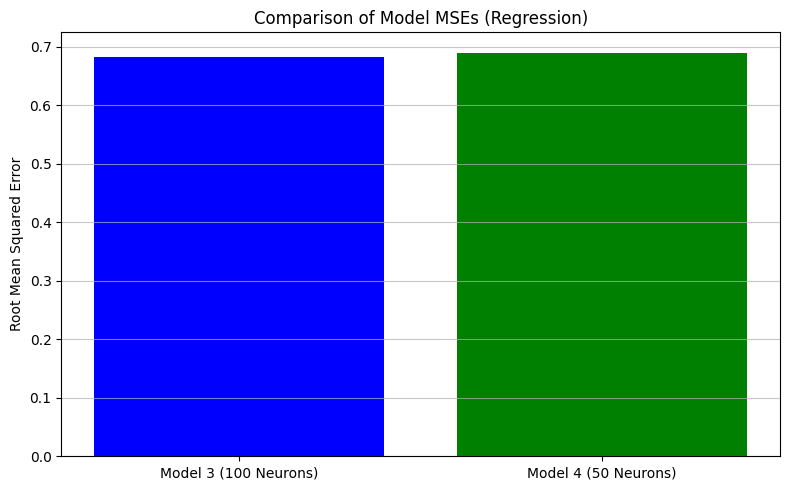

In [18]:
models = ['Model 3 (100 Neurons)', 'Model 4 (50 Neurons)']
rmses = [rmse1, rmse2]

plt.figure(figsize=(8, 5))
plt.bar(models, rmses, color=['blue', 'green'])
plt.title('Comparison of Model MSEs (Regression)')
plt.ylabel('Root Mean Squared Error')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()